In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
ref_time=read.csv("RQ2-dataset.csv")
summary(ref_time)

            repo        
 adempiere    :2104700  
 xipki        :  88623  
 eclipselink  :  80311  
 dotCMS-core  :  60211  
 querydsl     :  38065  
 carbon-apimgt:  32101  
 (Other)      :  69079  
                                                      ref_id       
 adempiere-00083e69e4fdc3bad5a3600d7754de172d428bac-12613:      1  
 adempiere-00083e69e4fdc3bad5a3600d7754de172d428bac-12614:      1  
 adempiere-00083e69e4fdc3bad5a3600d7754de172d428bac-12615:      1  
 adempiere-00083e69e4fdc3bad5a3600d7754de172d428bac-12616:      1  
 adempiere-00083e69e4fdc3bad5a3600d7754de172d428bac-12617:      1  
 adempiere-00083e69e4fdc3bad5a3600d7754de172d428bac-12618:      1  
 (Other)                                                 :2473084  
                             ref_type           is_dac       
 Move Attribute                  :1470540   DAC    :  18892  
 Change Attribute Access Modifier: 600724   Regular:2454198  
 Add Method Annotation           :  27729                    
 Rename 

## Plot the distribution in time between Regular refactorings and DAC refactorings

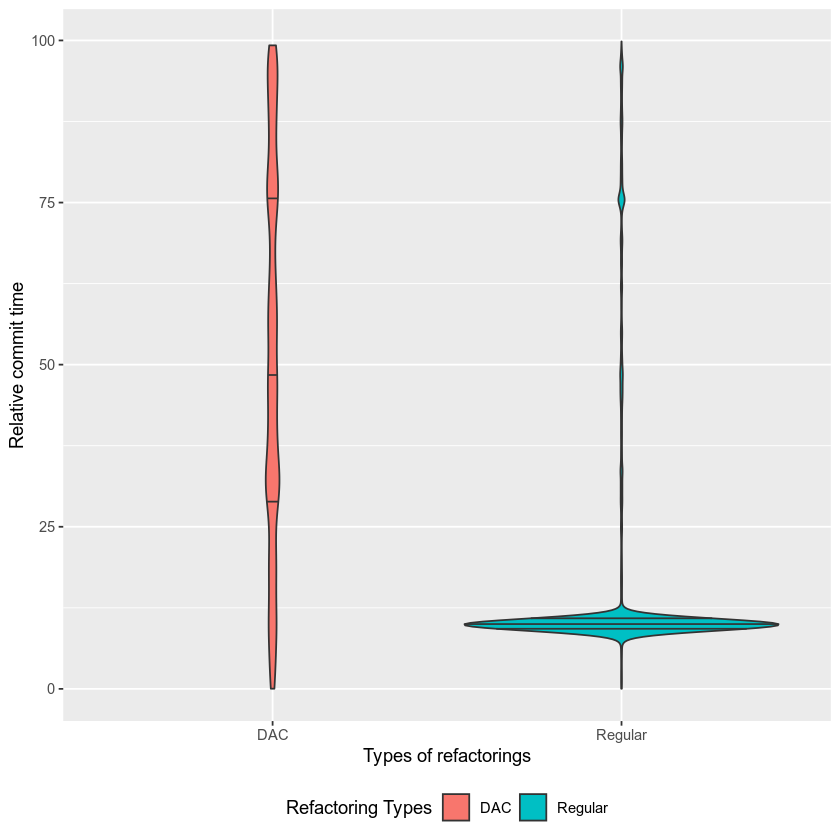

In [3]:
ggplot(ref_time, aes(fill=is_dac,x=as.factor(is_dac), y=relative_time))+
geom_violin(position = "dodge",draw_quantiles=c(0.25, 0.5, 0.75)) +
xlab("Types of refactorings") + 
ylab (expression(paste("Relative commit time"))) +
scale_fill_discrete(name = "Refactoring Types")+
theme(legend.position = "bottom")
ggsave("RQ2_commit_time_dac_reg.pdf",width=6, height = 4, units = "in")

In [9]:
#compute the Mann-Wittney U test to check if the difference is statistically significant
dac_med=c(47.218629,
59.631636,
7.533035,
52.977542,
72.197108,
69.227231,
20.566222,
80.259654,
73.031874,
34.684685,
59.03356,
39.059561
)
reg_med=c(51.573954,
65.612134,
26.39649,
9.897805,
52.944346,
42.904784,
53.791084,
75.321793,
67.175499,
27.837838,
37.168812,
48.589342
)

In [20]:
#compute the median and mean
dac<- subset(ref_time, is_dac == "DAC")
reg<- subset(ref_time, is_dac == "Regular")
#18886
reg_sampled<- sample_n(reg, 400)
#dac_sampled<- sample_n(dac, 400)

In [22]:
#Run Wilcoxon rank sum test or Mann-Whitney test
wilcox.test(dac$relative_time,reg_sampled$relative_time, conf.int = TRUE)


	Wilcoxon rank sum test with continuity correction

data:  dac$relative_time and reg_sampled$relative_time
W = 6458096, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 30.66642 37.20253
sample estimates:
difference in location 
               35.4277 
